In [7]:
import pandas as pd

csv_file = 'cleaned_ebay_deals.csv'
try:
    df = pd.read_csv(csv_file)
    print("CSV data loaded successfully!")
except FileNotFoundError:
    print(f"Error: {csv_file} not found. Ensure the file exists in your repository.")

CSV data loaded successfully!


C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\1475588245.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')


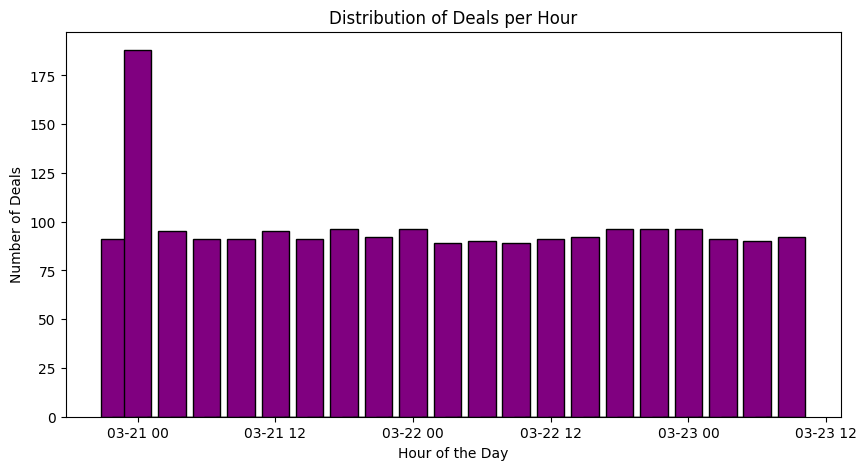

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='timestamp', inplace=True)
df.set_index('timestamp', inplace=True)

hourly_deals = (
    df['tile']
    .resample('H')
    .size()
)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(hourly_deals.index, hourly_deals.values, width=0.1, color='purple', edgecolor='black')
plt.title("Distribution of Deals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.show()

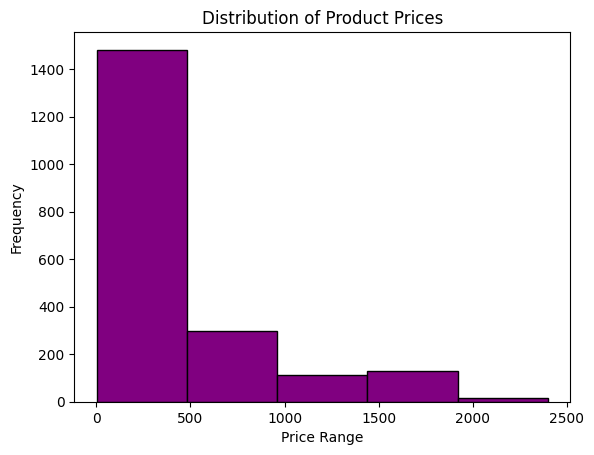

In [12]:
plt.hist(df['price'], bins=5, color='purple', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

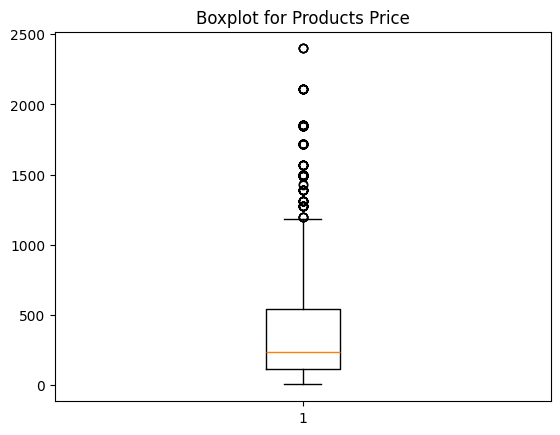

In [13]:
plt.boxplot(df['price']) #summarizes the distribution of the data, showing the median, quartiles, and potential outliers
plt.title('Boxplot for Products Price')
plt.show()

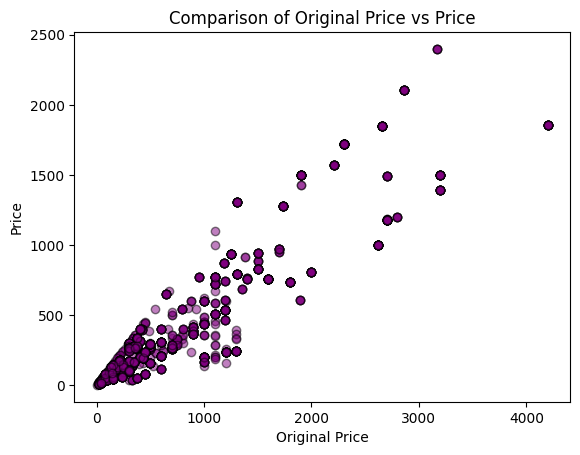

In [14]:
plt.scatter(df['original_price'], df['price'], color='purple', edgecolor='black', alpha=0.5)
plt.title('Comparison of Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.show()

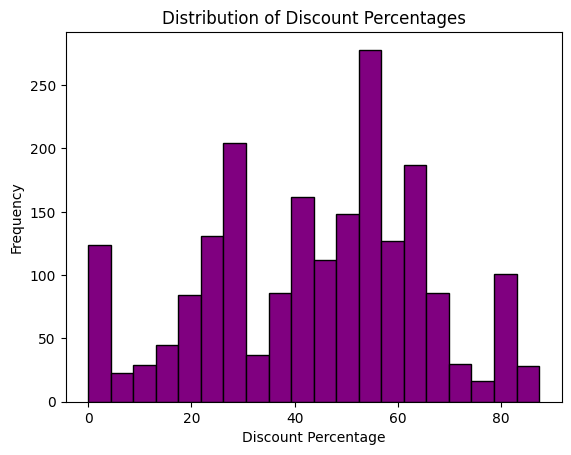

In [15]:
plt.hist(df['discount_percentage'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

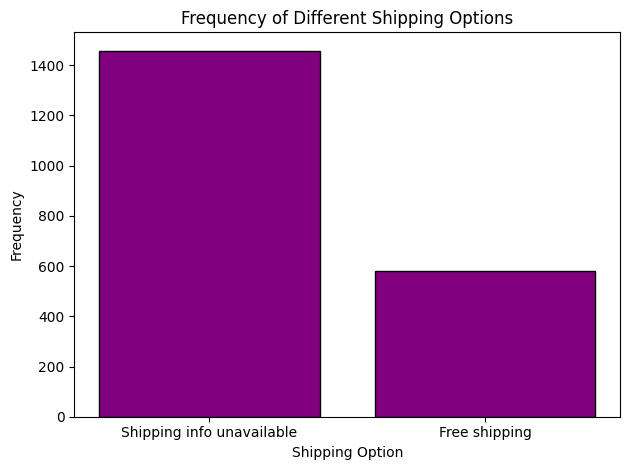

In [18]:
shipping_options = df['shipping'].value_counts()

plt.bar(shipping_options.index, shipping_options.values, color='purple', edgecolor='black')
plt.title('Frequency of Different Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

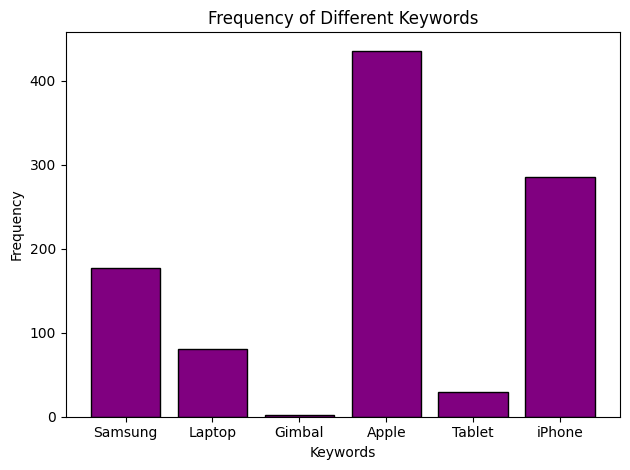

In [24]:
keywords = {"Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"}

keyword_counts = {}
for keyword in keywords:
    count = df['tile'].str.contains(keyword, case=False).sum()
    keyword_counts[keyword] = int(count)

keyword_counts_series = pd.Series(keyword_counts)

plt.bar(keyword_counts_series.index, keyword_counts_series.values, color='purple', edgecolor='black')
plt.title('Frequency of Different Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')  
plt.tight_layout()  
plt.show()

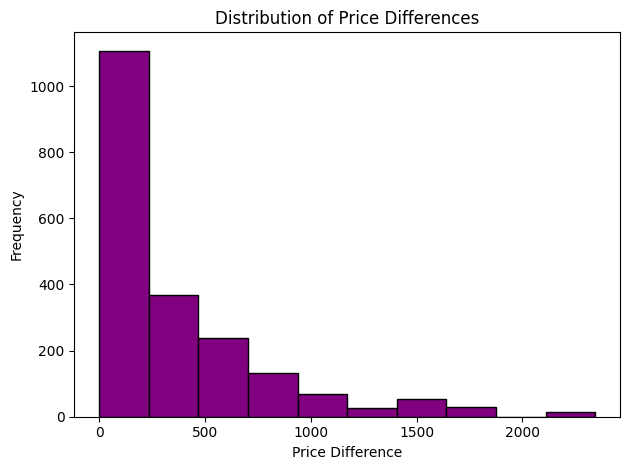

In [28]:
df['absolute_discount'] = df['original_price'] - df['price']

plt.hist(df['absolute_discount'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [29]:
from IPython.display import display

sorted_df = df.sort_values(by='discount_percentage', ascending=False)
top_5_deals = sorted_df.head(5)
display(top_5_deals)

,tile,price,original_price,shipping,item_url,discount_percentage,absolute_discount
timestamp,,,,,,,
2025-03-21 03:24:19,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,Shipping info unavailable,https://www.ebay.com/itm/255870647774?_trkparm...,87.34,262.00
2025-03-21 06:16:25,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Shipping info unavailable,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,287.05
2025-03-21 15:10:35,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Shipping info unavailable,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,287.05
2025-03-21 09:10:57,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Shipping info unavailable,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,287.05
2025-03-20 22:50:46,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Shipping info unavailable,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,287.05
